Packages

In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.linalg import lstsq

Loading in Datasets

In [31]:
# Define file paths for the CSV data files
file_paths = [
    "gas_gaf_595.csv",
    "neuro_20Y_595.csv",
    "neuro_25Y_595.csv",
    "neuro_27Y_595.csv",
    "stable_595.csv"
]

# Read the CSV file (currently only the last file in the list is used)
data = pd.read_csv(file_paths[-1])

# Display the first few rows of the dataframe to understand the structure of the data
print(data.head())


   Unnamed: 0  ID  d_ses_complete  d_ses  d_race_complete  d_race  d_sex  \
0           1   1             5.0    8.0              5.0     3.0    2.0   
1           2   2             2.0    NaN              4.0     1.0    2.0   
2           3   3             NaN    NaN              5.0     3.0    2.0   
3           4   4             4.0    NaN              5.0     3.0    2.0   
4           5   7             1.0    2.0              5.0     3.0    1.0   

   population  ineligible  pilot  ...  SANSA_25y_fascoring  wave  \
0           1           0      0  ...                 17.0   1.0   
1           1           0      0  ...                  NaN   1.0   
2           1           1      0  ...                  NaN   NaN   
3           1           0      0  ...                  NaN   1.0   
4           1           0      0  ...                  NaN   1.0   

   fiq_strict_bartlett_24m_rescaled  fiq_strict_bartlett_20y_rescaled  \
0                         98.423604                         9

Data Exploration

In [36]:
# Sample data for gas_gaf
data_gas_gaf = {
    'ID': [1, 2, 3, 4, 7, 8, 9, 12, 13, 14],
    'GRXX_APM_20_yr': [40, 35, None, 45, 41, None, 48, 40, None, 60],
    'GRXX_FPM_20_yr': [70, 50, None, 55, 50, None, 51, 45, None, 60],
    'GRXX_APY_20_yr': [55, None, None, None, 51, None, 65, None, None, None],
    'GRXX_FPY_20_yr': [60, None, None, None, 50, None, 70, None, None, None],
    'GRXXV_APM_25_yr': [55, None, None, None, 62, None, 70, 40, None, 70],
    'GRXXV_FPM_25_yr': [50, None, None, None, 71, None, 71, 40, None, 71],
    'GRXXV_APY_25_yr': [55, None, None, None, 61, None, 70, 40, None, 70],
    'GRXXV_FPY_25_yr': [50, None, None, None, 61, None, 70, 40, None, 70]
}

# Create a DataFrame from the sample gas_gaf data
gas_gaf = pd.DataFrame(data_gas_gaf)

# Sample data for stable DataFrame
data_stable = {
    'ID': [1, 2, 3, 4, 7, 8, 9, 12, 13, 14],
    'fiq_strict_bartlett_20y_rescaled': [30, 45, 60, 75, 90, 55, 65, 80, 70, 85],
    'fiq_strict_bartlett_25y_rescaled': [35, 50, 65, 80, 95, 60, 70, 85, 75, 90]
}

# Create a DataFrame from the sample stable data
stable = pd.DataFrame(data_stable)

# Extract relevant columns for 20-year and 25-year datasets
gas_gaf_20Y = gas_gaf[['ID', 'GRXX_APM_20_yr', 'GRXX_FPM_20_yr', 'GRXX_APY_20_yr', 'GRXX_FPY_20_yr']]
gas_gaf_25Y = gas_gaf[['ID', 'GRXXV_APM_25_yr', 'GRXXV_FPM_25_yr', 'GRXXV_APY_25_yr', 'GRXXV_FPY_25_yr']]

# Extract relevant columns from stable DataFrame
fiq_20Y = stable[['ID', 'fiq_strict_bartlett_20y_rescaled']]
fiq_25Y = stable[['ID', 'fiq_strict_bartlett_25y_rescaled']]

# Merge gas_gaf data with fiq data on 'ID'
ggf_20Y = pd.merge(gas_gaf_20Y, fiq_20Y, on='ID')
ggf_25Y = pd.merge(gas_gaf_25Y, fiq_25Y, on='ID')

# Define bins and categories for categorizing GAS and GAF values
bins = [1, 30, 60, 100]
category = [1, 2, 3]

# Categorize GAS and GAF values for the 20-year dataset
ggf_20Y['GAS_PM_Category'] = pd.cut(ggf_20Y['GRXX_APM_20_yr'], bins=bins, labels=category, right=True, include_lowest=True)
ggf_20Y['GAS_PY_Category'] = pd.cut(ggf_20Y['GRXX_APY_20_yr'], bins=bins, labels=category, right=True, include_lowest=True)
ggf_20Y['GAF_PM_Category'] = pd.cut(ggf_20Y['GRXX_FPM_20_yr'], bins=bins, labels=category, right=True, include_lowest=True)
ggf_20Y['GAF_PY_Category'] = pd.cut(ggf_20Y['GRXX_FPY_20_yr'], bins=bins, labels=category, right=True, include_lowest=True)

# Categorize GAS and GAF values for the 25-year dataset
ggf_25Y['GAS_PM_Category'] = pd.cut(ggf_25Y['GRXXV_APM_25_yr'], bins=bins, labels=category, right=True, include_lowest=True)
ggf_25Y['GAS_PY_Category'] = pd.cut(ggf_25Y['GRXXV_APY_25_yr'], bins=bins, labels=category, right=True, include_lowest=True)
ggf_25Y['GAF_PM_Category'] = pd.cut(ggf_25Y['GRXXV_FPM_25_yr'], bins=bins, labels=category, right=True, include_lowest=True)
ggf_25Y['GAF_PY_Category'] = pd.cut(ggf_25Y['GRXXV_FPY_25_yr'], bins=bins, labels=category, right=True, include_lowest=True)


Visualizing the relationship between IQ and GAS/GAF through scatterplots

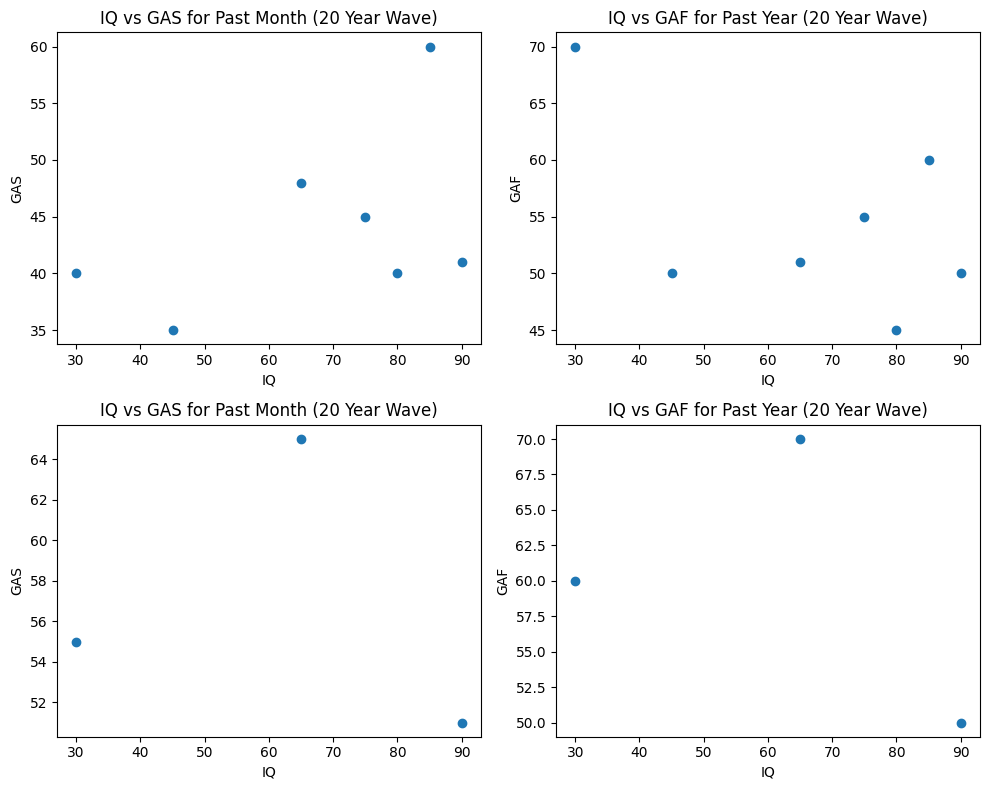

In [38]:
# Create scatter plots to visualize the relationship between IQ and GAS/GAF for the 20-year dataset
fig, sub = plt.subplots(2, 2, figsize=(10, 8))

# Scatter plot for IQ vs GAS for Past Month (20 Year Wave)
sub[0, 0].scatter(ggf_20Y['fiq_strict_bartlett_20y_rescaled'], ggf_20Y['GRXX_APM_20_yr'])
sub[0, 0].set_title('IQ vs GAS for Past Month (20 Year Wave)')
sub[0, 0].set_xlabel('IQ')
sub[0, 0].set_ylabel('GAS')

# Scatter plot for IQ vs GAF for Past Year (20 Year Wave)
sub[0, 1].scatter(ggf_20Y['fiq_strict_bartlett_20y_rescaled'], ggf_20Y['GRXX_FPM_20_yr'])
sub[0, 1].set_title('IQ vs GAF for Past Year (20 Year Wave)')
sub[0, 1].set_xlabel('IQ')
sub[0, 1].set_ylabel('GAF')

# Scatter plot for IQ vs GAS for Past Month (20 Year Wave)
sub[1, 0].scatter(ggf_20Y['fiq_strict_bartlett_20y_rescaled'], ggf_20Y['GRXX_APY_20_yr'])
sub[1, 0].set_title('IQ vs GAS for Past Month (20 Year Wave)')
sub[1, 0].set_xlabel('IQ')
sub[1, 0].set_ylabel('GAS')

# Scatter plot for IQ vs GAF for Past Year (20 Year Wave)
sub[1, 1].scatter(ggf_20Y['fiq_strict_bartlett_20y_rescaled'], ggf_20Y['GRXX_FPY_20_yr'])
sub[1, 1].set_title('IQ vs GAF for Past Year (20 Year Wave)')
sub[1, 1].set_xlabel('IQ')
sub[1, 1].set_ylabel('GAF')

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

Simple Linear Regression Model

In [40]:
# Prepare data for linear regression analysis
fiq_gas_py_20y = ggf_20Y[['fiq_strict_bartlett_20y_rescaled', 'GRXX_APY_20_yr']]
fiq_gas_py_20y_narm = ggf_20Y.dropna(subset=['fiq_strict_bartlett_20y_rescaled', 'GRXX_APY_20_yr'], how='any')

# Reshape data for regression
x = fiq_gas_py_20y_narm['fiq_strict_bartlett_20y_rescaled'].values.reshape(-1, 1)
x_intercept = np.hstack((np.ones((x.shape[0], 1)), x))  # Add intercept term
y = fiq_gas_py_20y_narm['GRXX_APY_20_yr'].values  # Target variable

# Perform least squares linear regression
b = lstsq(x_intercept, y)
intercept, slope = b[0]  # Extract intercept and slope from the results

# Print the regression coefficients
print('The intercept is:', intercept)
print('The slope is:', slope)

The intercept is: 59.71559633027524
The slope is: -0.04403669724770632


Linear Model Visualization

Text(0, 0.5, 'GAS')

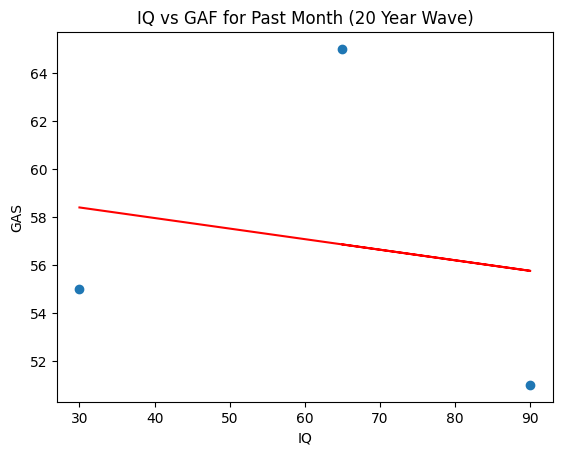

In [41]:
# Calculate the regression line
regression_line = slope * x + intercept

# Plot the regression line along with the scatter plot
plt.scatter(ggf_20Y['fiq_strict_bartlett_20y_rescaled'], ggf_20Y['GRXX_APY_20_yr'])
plt.plot(x, regression_line, color='red', label='Regression line')
plt.title('IQ vs GAF for Past Month (20 Year Wave)')
plt.xlabel('IQ')
plt.ylabel('GAS')

Preliminary Testing

In [42]:
# Calculate cut-off points for categorization based on regression results
cut_off_1 = (31 - intercept) / slope  # Cut-off for category 1
cut_off_2 = (61 - intercept) / slope  # Cut-off for category 2

# Define new bins and categories for IQ categorization
bins_1 = [1, 63, 111, 200]
category_1 = [1, 2, 3]

# Categorize IQ values based on calculated cut-offs
ggf_20Y['IQ_PY_Category'] = pd.cut(ggf_20Y['fiq_strict_bartlett_20y_rescaled'], bins=bins_1, labels=category_1, right=True, include_lowest=True)

# Calculate accuracy of the model by comparing GAS and IQ categories
ggf_20Y['Accuracy'] = (ggf_20Y['GAS_PY_Category'] == ggf_20Y['IQ_PY_Category']).astype(int)

# Set accuracy to NaN where either category is null
ggf_20Y.loc[ggf_20Y[['GAS_PY_Category', 'IQ_PY_Category']].isnull().any(axis=1), 'Accuracy'] = np.nan

# Count the number of correct and incorrect classifications
accuracy_counts = ggf_20Y.Accuracy.value_counts()  # correct = 141, incorrect = 100

# Print the accuracy of the linear model with binning
print('Accuracy of Linear Model with Binning is:', 141 / (141 + 100))

Accuracy of Linear Model with Binning is: 0.5850622406639004
